<h1>Objective -  Classification of rice diseases based on the images of infected rice plants</h1>
<h3>We need to identify the diseases from the images of a rice plant. We will consider three rice plant diseases namely Hispa, LeafBlast and BrownSpot. For the image acquisition the images of rice plant leaves are directly captured from the farm field for Hispa, LeafBlast and BrownSpot diseases.</h3>

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

import cv2
from os import listdir
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, ImageDataGenerator
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
print ("Following is the input directory structure - ")
print(os.listdir("../input/rice-diseases-image-dataset/RiceDiseaseDataset/"))

print ("\n Following are the categories for rice diseases. It is a multi-class classification problem - ")
print(os.listdir("../input/rice-diseases-image-dataset/RiceDiseaseDataset/train"))

Following is the input directory structure - 
['train', 'validation']

 Following are the categories for rice diseases. It is a multi-class classification problem - 
['Hispa', 'LeafBlast', 'BrownSpot', 'Healthy']


<h3>We have divided the datasets into two parts i.e. <b>Training Dataset and Validation Dataset</b>. Generalization is the ability of machine to learn on being introduced with the sets of data during training so that when it is introduced to new and unseen examples, it can perform accurately.**Training Data** is labeled data used to train your machine learning algorithms and increase accuracy.Generally, training data is split up more or less randomly, while making sure to capture all the important classes you are aware of. **Validation set** is required to validate the learning so far. In statistics it is known as cross validation.</h3>

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def plotRawImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = requiredInputDir+"/"+img
        inputImage=mpimg.imread(img)
        ax.imshow(inputImage)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Populating the interactive namespace from numpy and matplotlib


<h3>Introduction to Image Processing - Image processing is divided into analogue image processing and digital image processing. Digital image processing is the use of computer algorithms to perform image processing on digital images. As a subfield of digital signal processing, digital image processing has many advantages over analogue image processing. It allows a much wider range of algorithms to be applied to the input data — the aim of digital image processing is to improve the image data (features) by suppressing unwanted distortions and/or enhancement of some important image features so that our AI-Computer Vision models can benefit from this improved data to work on.</h3>
<h3>An image is nothing more than a two-dimensional array of numbers(or pixels) ranging between 0 and 255. It is defined by the mathematical function f(x,y) where x and y are the two co-ordinates horizontally and vertically.</h3>
<h3>Following are the raw images from different categories like "HISPA", "BROWNSPOT", "LEAFBLAST" and "HEALTHY".</h3>

Following are the raw images of the 'BrownSpot' category :


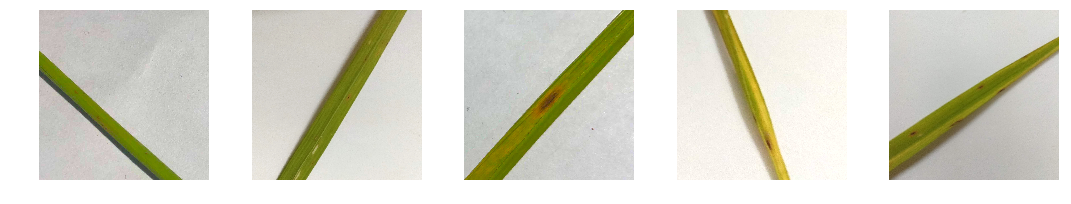

In [4]:
print ("Following are the raw images of the 'BrownSpot' category :")
requiredInputDir = "../input/rice-diseases-image-dataset/RiceDiseaseDataset/train/BrownSpot"
imageList = listdir(requiredInputDir)
plotRawImages(imageList[0:5])

Following are the raw images of the 'Hispa' category :


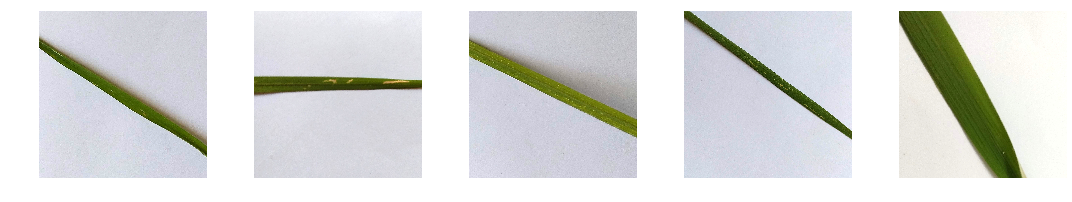

In [5]:
print ("Following are the raw images of the 'Hispa' category :")
requiredInputDir = "../input/rice-diseases-image-dataset/RiceDiseaseDataset/train/Hispa"
imageList = listdir(requiredInputDir)
plotRawImages(imageList[0:5])

Following are the raw images of the 'LeafBlast' category :


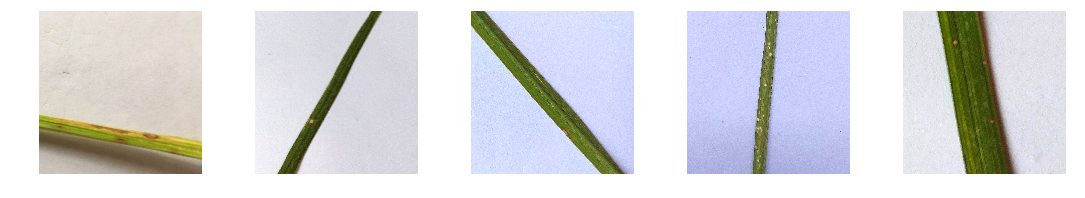

In [6]:
print ("Following are the raw images of the 'LeafBlast' category :")
requiredInputDir = "../input/rice-diseases-image-dataset/RiceDiseaseDataset/train/LeafBlast"
imageList = listdir(requiredInputDir)
plotRawImages(imageList[20:25])

Following are the raw images of the 'Normal/Healthy' category :


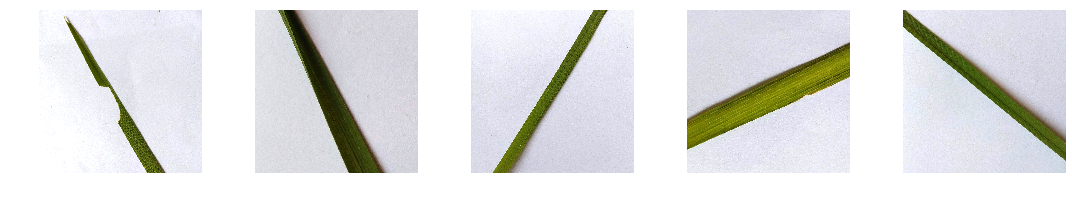

In [7]:
print ("Following are the raw images of the 'Normal/Healthy' category :")
requiredInputDir = "../input/rice-diseases-image-dataset/RiceDiseaseDataset/train/Healthy"
imageList = listdir(requiredInputDir)
plotRawImages(imageList[0:5])


<h2>Let's start with image processing steps</h2>
<h3>We are displaying the dimensions and format of the input image in the given code</h3>

../input/rice-diseases-image-dataset/RiceDiseaseDataset/train/LeafBlast/IMG_20190419_133937.jpg
The dimension of the image is 1051 x 1051
The format of the image -  JPEG


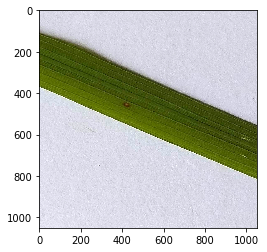

In [8]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
%matplotlib inline

requiredInputDir = "../input/rice-diseases-image-dataset/RiceDiseaseDataset/train/LeafBlast"
imageList = listdir(requiredInputDir)
#filePath = requiredInputDir+"/"+imageList[21]
filePath = "../input/rice-diseases-image-dataset/RiceDiseaseDataset/train/LeafBlast/IMG_20190419_133937.jpg"
print (filePath)
pil_im = Image.open(filePath, 'r')
imshow(np.asarray(pil_im))
width, height = pil_im.size
print("The dimension of the image is", width, "x", height)
print ("The format of the image - ", pil_im.format)

Original Image Shape (1051, 1051, 3)


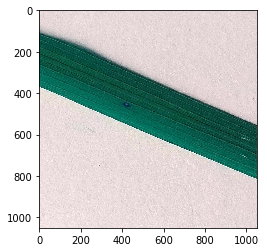

In [9]:
%matplotlib inline
import cv2
bgrimg = cv2.imread(str(filePath))
plt.imshow(bgrimg)
print('Original Image Shape',bgrimg.shape)

<h3>Let's check the values of the pixels in one row of the image matrix</h3>

In [10]:
print('The first row of the image matrix contains',len(bgrimg[1]),'pixels')
print(bgrimg[1])

The first row of the image matrix contains 1051 pixels
[[246 232 233]
 [243 229 230]
 [240 226 227]
 ...
 [237 221 222]
 [237 221 222]
 [233 217 218]]


<h3>Following is the Gray Scale the image - </h3>

New Image Shape (1051, 1051)


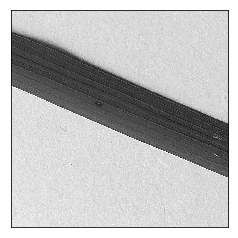

In [11]:
grayimg = cv2.cvtColor(bgrimg,cv2.COLOR_BGR2GRAY)
#To plot the image
plt.imshow(grayimg,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg.shape)

<h3>It is important to understand the structure of the image here. We reduced a dimension when we transformed from the BGR colorspace to grayscale. Why did this happen? GrayScale -  Grayscale is a range of monochromatic shades from black to white. Many image editing programs allow you to convert a color image to black and white, or grayscale. This process removes all color information, leaving only the luminance of each pixel.The luminance of a pixel value of a grayscale image ranges from 0 to 255. The conversion of a color image into a grayscale image is converting the RGB values (24 bit) into grayscale value (8 bit). Various image processing techniques and software applications converts color image to grayscale image. Gray scale is most preferred in image processing Because it is a one layer image from 0-255 whereas the RGB have three different layer image. So that is a reason we prefer grey scale image instead of RGB. Also color increases the complexity of the model and hence converting the images to a grayscale is beneficial. Luminance can also be described as brightness or intensity, which can be measured on a scale from black (zero intensity) to white (full intensity)</h3>

Converting the image into a gray scale image - 


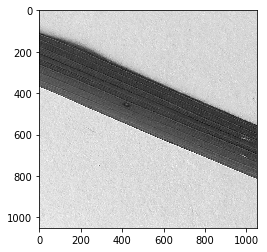

In [12]:
print ("Converting the image into a gray scale image - ")
pil_im = Image.open(filePath, 'r').convert('L')
imshow(np.asarray(pil_im), cmap='gray')

In [13]:
#To understand this further, let's display one entire row of the image matrix
print('The first row of the image matrix contains',len(grayimg[1]),'pixels')
grayimg[1]

The first row of the image matrix contains 1051 pixels


array([234, 231, 228, ..., 223, 223, 219], dtype=uint8)

<h3> We are going to take a look at the distribution of the intensity values of all the pixels present in our image. We are going to flatten the image matrix and put the intensity values of all the pixels in one single row vector. We are going to find the prominent peaks.</h3>

Text(0.5, 1.0, 'Distribution of intensity values (Zoomed In)')

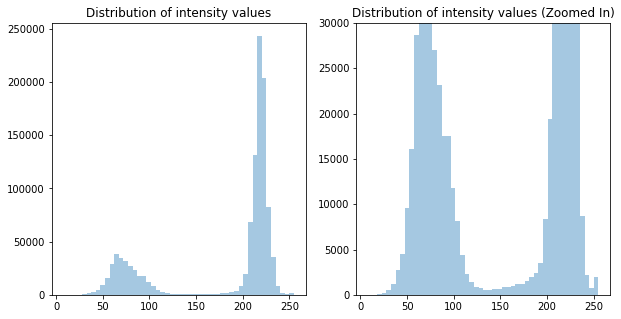

In [14]:
import seaborn as sns
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(grayimg.flatten(),kde=False) #This is to flatten the matrix and put the intensity values of all the pixels in one single row vector
plt.title('Distribution of intensity values')

#To zoom in on the distribution and see if there is more than one prominent peak 
plt.subplot(1,2,2)
sns.distplot(grayimg.flatten(),kde=False) 
plt.ylim(0,30000) 
plt.title('Distribution of intensity values (Zoomed In)')

<h3>We can see that there are 2 prominent peaks. The count of pixels with intensity values around 0 is extrememly high (30000). We would expect this to occur as the leaf cover a smaller portion of the picture as compared to the background which is primarily black. Our job here is to seperate the two, that is, seperate the leaf from the background. The optimal seperation value is somewhere around 20 but rather than relying on such descriptive statistics, we should take a more formal approach such as using Otsu's method. Otsu's method, named after Nobuyuki Otsu is used to automatically perform clustering-based image thresholding, or, the reduction of a graylevel image to a binary image. The algorithm assumes that the image contains two classes of pixels following bi-modal histogram (foreground pixels and background pixels), it then calculates the optimum threshold separating the two classes so that their combined spread (intra-class variance) is minimal, or equivalently, so that their inter-class variance is maximal. Otsu’s method exhibits relatively good performance if the histogram can be assumed to have bimodal distribution and assumed to possess a deep and sharp valley between two peaks (source : https://en.wikipedia.org/wiki/Otsu%27s_method)</h3>

In [15]:
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(grayimg)
print('The optimal seperation value is',thresh_val)

The optimal seperation value is 146


<h3>Now we'll use the np.where function to encode all pixels with an intensity value > the threshold value as 1 and all other pixels as 0. The result of this function will be stored in a variable called mask</h3>

Text(0.5, 1.0, 'Mask')

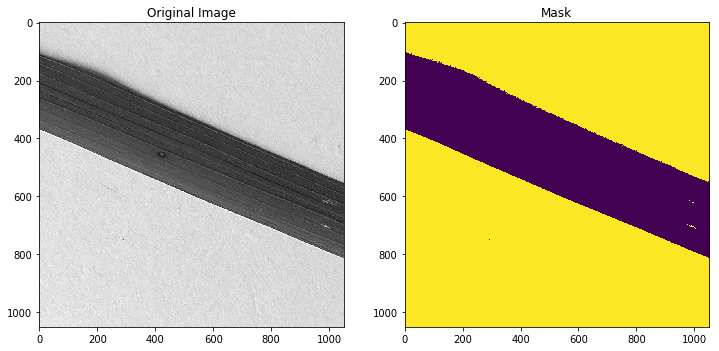

In [16]:
mask=np.where(grayimg>thresh_val,1,0)
#To plot the original image and mask side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
maskimg = mask.copy()
plt.imshow(maskimg, cmap='viridis')
plt.title('Mask')

<h3>We see that the mask has done a decent job. If these images were to appear in a newspaper column titled 'Spot the difference between' (except the obvious colour difference), it would have had people scratch their heads in frustration. Mask has done a good job in finding the whole leaf from the image.</h3>
<h3>let's apply one more method i.e. "K-means" to seperate the leaf from the background</h3>

Text(0.5, 1.0, 'Mask with Otsu Seperation')

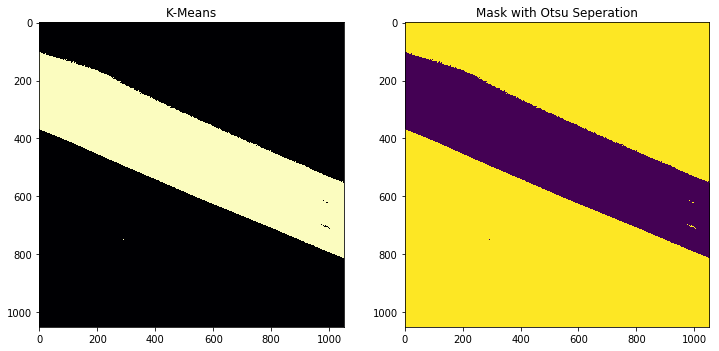

In [17]:
#Let's see if K-Means does a good job on this data 
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2) #2 as we're still trying to seperate the lighter coloured nuclei from the darker coloured background 
kmeans.fit(grayimg.reshape(grayimg.shape[0]*grayimg.shape[1],1))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(kmeans.labels_.reshape(width,height),cmap='magma')
plt.title('K-Means')

plt.subplot(1,2,2)
plt.imshow(maskimg, cmap='viridis')
plt.title('Mask with Otsu Seperation')

<h3>Let's see if there is any difference by comparing the labels of Otsu and K-Means at a pixel level, summing over the booleans and dividing them by the total number of pixels in the image. If the result is 1, it means there is no difference at all</h3>

In [18]:
#To check if there's any difference
sum((kmeans.labels_.reshape(width,height)==mask).flatten())/(mask.shape[0]*mask.shape[1])

0.0

<h3>There is no difference at all. For a deeper explanantion as to why this could have happened, one may read D Liu's paper (http://ieeexplore.ieee.org/document/5254345/?reload=true) where he has compared K-Means with Otsu's method</h3>

<h3>EDGE DETECTION - Some important videos to watch before beginning this section - https://www.youtube.com/watch?v=XuD4C8vJzEQ&index=2&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF and https://www.youtube.com/watch?v=am36dePheDc&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=3F to get an idea of the underlying matrix algebra in edge detection. Credit to Andrew Ng for always explaining the intuition behind a particular method before going into the more complex math

The first thing we'll be trying out is the Sobel Filter. A clear and concise explanation of the filter and its usage in Python (OpenCV) is given here : https://docs.opencv.org/3.2.0/d2/d2c/tutorial_sobel_derivatives.html</h3>

Text(0.5, 1.0, 'Sobel Y (horizontal edges)')

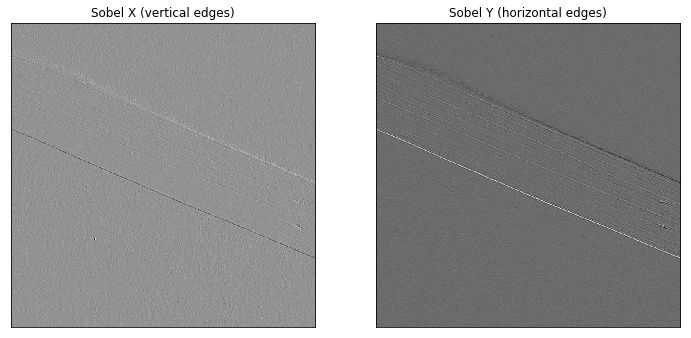

In [19]:
#cv2.Sobel arguments - the image, output depth, order of derivative of x, order of derivative of y, kernel/filter matrix size
sobelx = cv2.Sobel(grayimg,int(cv2.CV_64F),1,0,ksize=3) #ksize=3 means we'll be using the 3x3 Sobel filter
sobely = cv2.Sobel(grayimg,int(cv2.CV_64F),0,1,ksize=3)

#To plot the vertical and horizontal edge detectors side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X (vertical edges)')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(sobely,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Sobel Y (horizontal edges)')

Text(0.5, 1.0, 'Sobel Filter')

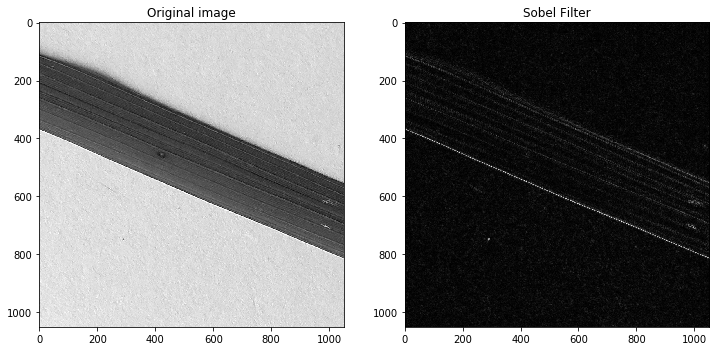

In [20]:
#Plotting the original image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original image')

#Now to combine the 2 sobel filters
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
plt.subplot(1,2,2)
plt.imshow(sobel,cmap='gray')
plt.title('Sobel Filter')

<h3>Rotating the image in 90 degrees</h3>

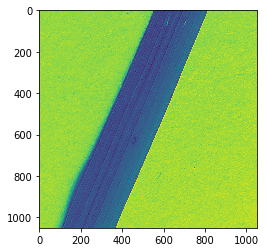

In [21]:
imshow(np.rot90(pil_im))

In [22]:
import sys
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        grayimg = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

        if image is not None :
            final = cv2.resize(grayimg, default_image_size)  
            return img_to_array(final.flatten().reshape(1,784))
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [23]:
default_image_size = tuple((28, 28))
directory_root = '../input/rice-diseases-image-dataset/RiceDiseaseDataset/train/'
counter = 0
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for label in root_dir:
        print (label)
        print (counter)
        reqLabelDir = f"{directory_root}/{label}/"
        plant_disease_image_list = listdir(reqLabelDir)
        for image in plant_disease_image_list:
            image_directory = f"{directory_root}/{label}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(label)
        print("[INFO] Image loading completed")  
        counter = counter + 1
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
Hispa
0
[INFO] Image loading completed
LeafBlast
1
[INFO] Image loading completed
BrownSpot
2
[INFO] Image loading completed
Healthy
3
[INFO] Image loading completed


In [24]:
finalList  = []
for x in image_list:
    reqArr = x.reshape(1,784) / 255
    finalList.append(reqArr)

dfLabelList = []
for x in range(0,785):
    label = 'pixel'+str(x)
    dfLabelList.append(label)
dfLabelList.append('Target')

df = pd.DataFrame([y[0] for y in finalList])
df[784] = label_list
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.878431,0.862745,0.878431,0.870588,0.862745,0.878431,0.850980,0.847059,0.866667,0.843137,...,0.835294,0.858824,0.807843,0.823529,0.811765,0.843137,0.815686,0.835294,0.764706,Hispa
1,0.929412,0.909804,0.925490,0.929412,0.929412,0.921569,0.921569,0.933333,0.929412,0.921569,...,0.827451,0.839216,0.843137,0.839216,0.854902,0.843137,0.839216,0.866667,0.870588,Hispa
2,0.803922,0.811765,0.784314,0.803922,0.803922,0.803922,0.803922,0.807843,0.807843,0.796078,...,0.803922,0.796078,0.796078,0.831373,0.807843,0.815686,0.815686,0.796078,0.784314,Hispa
3,0.274510,0.760784,0.815686,0.800000,0.800000,0.803922,0.827451,0.815686,0.823529,0.835294,...,0.850980,0.874510,0.866667,0.878431,0.854902,0.882353,0.901961,0.913725,0.921569,Hispa
4,0.270588,0.278431,0.313726,0.305882,0.305882,0.321569,0.356863,0.945098,0.945098,0.945098,...,0.200000,0.713726,0.933333,0.952941,0.984314,0.992157,0.984314,0.996078,0.996078,Hispa


In [25]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#nodeStatus = {'Hispa':0, 'LeafBlast':1, 'BrownSpot':2, 'Healthy':3}
#df[784] = [nodeStatus[i] for i in df[784]]

In [26]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.iloc[:, 0:784].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.13753063 0.08837906 0.08350144]


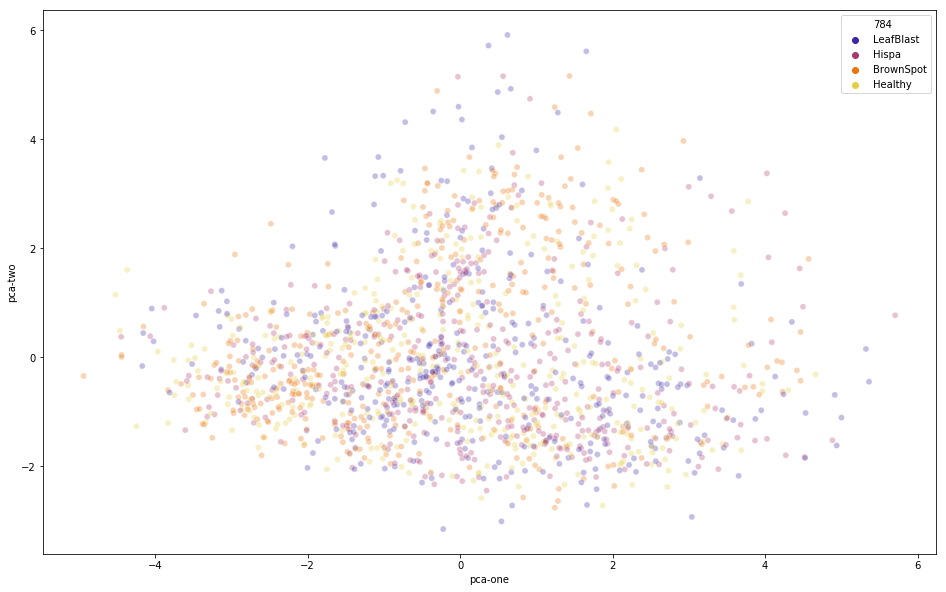

In [27]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=784,
    palette=sns.color_palette("CMRmap", 4),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

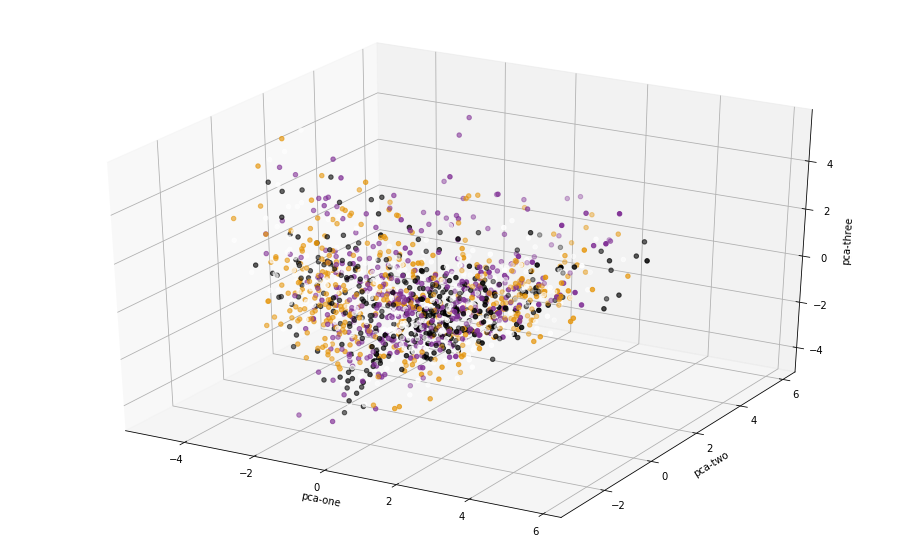

In [28]:
nodeStatus = {'Hispa':0, 'LeafBlast':1, 'BrownSpot':2, 'Healthy':3}
df[784] = [nodeStatus[i] for i in df[784]]
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:][784], 
    cmap='CMRmap'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [29]:
from keras import backend as K

img_width = 300
img_height = 300

if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
    chanDim = 1
else: 
    input_shape = (img_width, img_height, 3) 
    chanDim = -1
print (input_shape)

(300, 300, 3)


In [30]:
%%time
trainDir = "../input/rice-diseases-image-dataset/RiceDiseaseDataset/train"
def get_size_statistics(trainDir):
    heights = []
    widths = []
    root_dir = listdir(trainDir)
    for label in root_dir:
        print ("Processing for the label - ", label)
        reqLabelDir = f"{trainDir}/{label}/"  
        for img in os.listdir(reqLabelDir): 
            path = os.path.join(reqLabelDir, img)
            data = np.array(Image.open(path)) #PIL Image library
            heights.append(data.shape[0])
            widths.append(data.shape[1])
            avg_height = sum(heights) / len(heights)
            avg_width = sum(widths) / len(widths)
    print('\n')
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))
get_size_statistics(trainDir)


Processing for the label -  Hispa
Processing for the label -  LeafBlast
Processing for the label -  BrownSpot
Processing for the label -  Healthy


Average Height: 2052.968125
Max Height: 3120
Min Height: 812


Average Width: 2052.97
Max Width: 3120
Min Width: 812
CPU times: user 3min 38s, sys: 11.9 s, total: 3min 50s
Wall time: 3min 51s


In [31]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

EPOCHS = 30
INIT_LR = 1e-3
BATCH_SIZE = 32
default_image_size = tuple((256, 256))
width=256
height=256
depth=3

In [32]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [33]:
trainImageList, trainLabelList = [], []
root_dir = listdir(trainDir)
for label in root_dir:
    print ("Processing for the label - ", label)
    reqLabelDir = f"{trainDir}/{label}/"  
    for img in os.listdir(reqLabelDir):
        image_directory = os.path.join(reqLabelDir, img)
        trainImageList.append(convert_image_to_array(image_directory))
        trainLabelList.append(label)

Processing for the label -  Hispa
Processing for the label -  LeafBlast
Processing for the label -  BrownSpot
Processing for the label -  Healthy


In [34]:
image_size = len(trainImageList)
print(image_size)

1600


In [35]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(trainLabelList)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print (n_classes)
print(label_binarizer.classes_)

4
['BrownSpot' 'Healthy' 'Hispa' 'LeafBlast']


In [36]:
np_image_list = np.array(trainImageList, dtype=np.float16) / 225.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.30, random_state = 42) 

[INFO] Spliting data to train, test


In [37]:
aug = ImageDataGenerator(
    rotation_range=30, width_shift_range=0.15,
    height_shift_range=0.15, shear_range=0.15, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [38]:
model = Sequential()
inputShape = (256, 256, 3)

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))
print (model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)       

In [39]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [40]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', verbose=1, monitor='acc', save_best_only=True, mode='auto') 

In [41]:
BATCH_SIZE = 128
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BATCH_SIZE),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BATCH_SIZE,
    epochs=20, verbose=1#    callbacks=[checkpoint]
    )

Epoch 1/20
8/8 [==============================] - 165s 21s/step - loss: 1.4008 - accuracy: 0.6971 - val_loss: 0.5887 - val_accuracy: 0.7490
Epoch 2/20
8/8 [==============================] - 159s 20s/step - loss: 0.6519 - accuracy: 0.7432 - val_loss: 0.6075 - val_accuracy: 0.7385
Epoch 3/20
8/8 [==============================] - 164s 20s/step - loss: 0.5778 - accuracy: 0.7371 - val_loss: 0.6140 - val_accuracy: 0.6547
Epoch 4/20
8/8 [==============================] - 159s 20s/step - loss: 0.5413 - accuracy: 0.7538 - val_loss: 0.6199 - val_accuracy: 0.6391
Epoch 5/20
8/8 [==============================] - 160s 20s/step - loss: 0.5339 - accuracy: 0.7576 - val_loss: 0.7271 - val_accuracy: 0.6313
Epoch 6/20
8/8 [==============================] - 159s 20s/step - loss: 0.5388 - accuracy: 0.7543 - val_loss: 2.2608 - val_accuracy: 0.6302
Epoch 7/20
8/8 [==============================] - 161s 20s/step - loss: 0.5339 - accuracy: 0.7649 - val_loss: 4.4752 - val_accuracy: 0.6302
Epoch 8/20
8/8 [====